In [2]:
import csv
import glob
import numpy as np
import re
import os
import pandas
import matplotlib.pyplot as plt
os.getcwd()



'/home/gabriel/Air_Quality_Hub/dat_files'

In [24]:
file_pattern = '*06.dat'
delimiter = None

files = glob.glob(file_pattern)
if not files:
    print(f"No file matching the pattern *.'{file_pattern}'")
else:
  input_file =files[0]
  output_csv = input_file.replace('.dat','.csv')
 
with open(input_file,'r') as infile,open(output_csv,'w',newline='') as  outfile:
   header = None
   fields = None
   data_started = False
   csv_writer = csv.writer(outfile)
   for line in infile:
      clean_line = line.strip()
       
      if not data_started:
        if re.match("Time",clean_line):
          header = re.split(r'\s+',clean_line)
          csv_writer.writerow(header)
          data_started = True
          print(header)
          continue
        
      else:
          if re.match(r'[0-9]',clean_line):
           data_val = re.split(r'\s+',clean_line)
           if len(data_val) == len(header):
            csv_writer.writerow(data_val)
         
df=pandas.read_csv(output_csv,header=0,index_col=['Time'],parse_dates=['Time']) 
df.index
#df["O3_DU"].plot()
#plt.show()

['Time', 'Press', 'GeopAlt', 'Temp', 'RH', 'O3_mPa', 'O3_ppmv', 'O3_DU', 'Wind_Dir', 'Wind_Spd', 'TPump', 'O3CellI', 'GPS_Lat', 'GPS_Lon', 'GPS_Alt']


/tmp/ipykernel_3565/3797606209.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pandas.read_csv(output_csv,header=0,index_col=['Time'],parse_dates=['Time'])


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7480, 7481, 7482, 7483, 7484, 7485, 7486, 7487, 7488, 7489],
      dtype='int64', name='Time', length=7490)

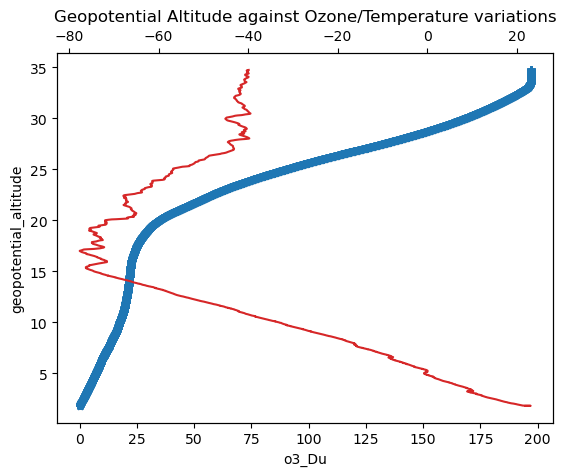

In [96]:
y = df['GeopAlt']
x = df['O3_mPa']
x1 = df['O3_ppmv']
x2 = df['O3_DU']
x3 = df['Temp']
fig,ax =plt.subplots()
ax.set(xlabel="o3_Du",ylabel="geopotential_altitude",title="Geopotential Altitude against Ozone/Temperature variations")
plt.plot(x2,y,marker ='*',linestyle='-.')
#plt.savefig("Geopotential height against Ozone(dobsons).png")
ax2 = ax.twiny()
color = 'tab:red'
#ax2.set_xlabel('temperature',color)
ax2.plot(x3,y,color=color)
#ax2.tick_params(axis='x',color=color)
#plt.savefig("Geopotential height against Ozone(dobsons).png")


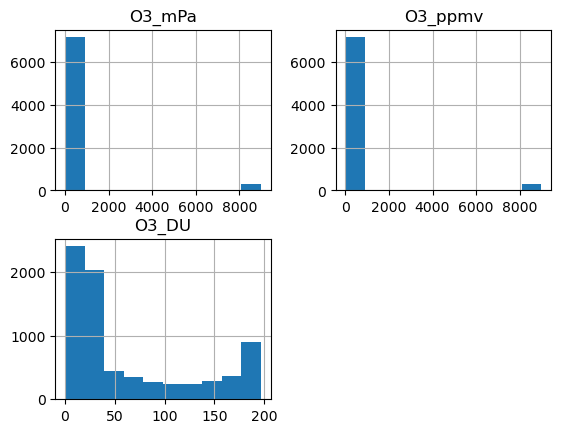

In [58]:
df.hist(['O3_mPa','O3_ppmv','O3_DU'])
#plt.savefig('O3_level_hist')

In [55]:
import Sta

,Time,Press,GeopAlt,Temp,RH,O3_mPa,O3_ppmv,O3_DU,Wind_Dir,Wind_Spd,TPump,O3CellI,GPS_Lat,GPS_Lon,GPS_Alt
count,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000
mean,3744.500000,188.893587,17.908394,-42.582495,21.713885,390.482273,387.978777,63.458238,118.858701,13.388379,22.095760,1.269117,-1.319789,36.476149,17.987926
std,2162.321091,213.372267,9.524452,25.520782,27.222784,1821.932699,1822.459941,65.548460,88.908180,11.437941,11.042081,1.143537,0.021271,0.236597,9.623392
min,0.000000,5.830000,1.790000,-77.620000,1.000000,0.245200,0.020000,0.000000,0.020000,0.680000,6.880000,0.086300,-1.367480,36.095090,1.779000
25%,1872.250000,20.702500,9.297000,-65.360000,1.000000,1.583475,0.039300,16.462500,61.482500,4.610000,10.230000,0.423125,-1.335107,36.194950,9.294000
50%,3744.500000,84.760000,17.586000,-43.180000,7.000000,2.482800,0.205000,25.315000,94.400000,9.190000,21.485000,0.640800,-1.311730,36.461635,17.615000
75%,5616.750000,319.070000,26.166000,-27.692500,47.000000,9.084025,6.107500,109.435000,149.145000,19.070000,34.220000,2.025975,-1.303160,36.725585,26.293000
max,7489.000000,824.550000,34.732000,23.120000,94.000000,9000.000000,9000.000000,196.910000,359.970000,47.390000,36.500000,4.005600,-1.292850,36.759350,35.143000


In [ ]:
str1 = ' It  is a hot  summer'
x =re.split(r'\s{2}',str1)
print(x)


In [ ]:
str1 =" 1 2 4 3 dkkis"
re.match(r"\s+[0-9]",str1)

In [29]:
x = np.linspace(2,-2,5)
for i in x:
    print(i)

2.0
1.0
0.0
-1.0
-2.0


In [ ]:
def convert_dat_to_csv(dat_file_path, csv_file_path, delimiter=None):
    """
    Converts a .dat file to a .csv file.

    Args:
        dat_file_path (str): The path to the .dat file.
        csv_file_path (str): The path to the output .csv file.
        delimiter (str, optional): The delimiter used in the .dat file.
            If None, the function will attempt to auto-detect it. Defaults to None.
    """
    try:
        with open(dat_file_path, 'r') as infile, open(csv_file_path, 'w', newline='') as outfile:
            csv_writer = csv.writer(outfile)
            header = None
            data_started = False

            # Read the first few lines to determine the delimiter if not provided
            if delimiter is None:
                sample_lines = infile.readlines(5)
                infile.seek(0)
                if any(',' in line for line in sample_lines):
                    delimiter = ','
                elif any('\t' in line for line in sample_lines):
                    delimiter = '\t'
                elif any(';' in line for line in sample_lines):
                    delimiter = ';'
                else:
                    delimiter = ' '
                    print("Warning: No common delimiter found. Assuming space-separated values.")

            for line in infile:
                cleaned_line = line.strip()

                if not data_started:
                    if not header:
                        # Attempt to extract header
                         if re.match(r"Time\s+", cleaned_line):
                            header = re.split(r'\s+', cleaned_line)
                            continue  # Go to the next line
                         else:
                            header =  re.split(delimiter, cleaned_line)
                            csv_writer.writerow(header) #write the header
                            data_started = True
                            continue
                    else:
                        data_values = re.split(delimiter, cleaned_line)
                        if len(data_values) == len(header):
                            csv_writer.writerow(data_values)
                            data_started = True
                        else:
                            print(f"Skipping line with incorrect number of values: {cleaned_line}")
                else:
                    data_values = re.split(delimiter, cleaned_line)
                    if len(data_values) == len(header):
                        csv_writer.writerow(data_values)
                    else:
                        print(f"Skipping line with incorrect number of values: {cleaned_line}")

        print(f"Successfully converted '{dat_file_path}' to '{csv_file_path}'")

    except FileNotFoundError:
        print(f"Error: File not found at path '{dat_file_path}'")
    except Exception as e:
        print(f"An error occurred during conversion: {e}")



if __name__ == "__main__":
    file_pattern = '*06.dat'
    files = glob.glob(file_pattern)
    if not files:
        print(f"No file matching the pattern '{file_pattern}'")
    else:
        input_file = files[0]
        output_csv_file = input_file.replace('.dat', '.csv')
        convert_dat_to_csv(input_file, output_csv_file)


In [25]:
import datetime
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [28]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [31]:
datetime.strptime(12,"%H:%M:%S")

AttributeError: module 'datetime' has no attribute 'strptime'